# Comparing Parameters

Setting Working Directory

In [7]:
import os
cd = os.chdir("/Users/admin/Desktop/Repositories/self_learning/drugdiscovery/data/part4")

current = os.getcwd()
print(f'Your current working directory is: {current}')

Your current working directory is: /Users/admin/Desktop/Repositories/self_learning/drugdiscovery/data/part4


In [ ]:
# Importing Libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor



In [5]:
! pip install lazypredict

  Using cached lazypredict-0.2.13-py2.py3-none-any.whl.metadata (12 kB)
  Using cached lightgbm-4.5.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached lazypredict-0.2.13-py2.py3-none-any.whl (12 kB)
Using cached lightgbm-4.5.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)
Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl (1.9 MB)


In [12]:
# Load Data Set

! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-12-11 22:50:19--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2024-12-11 22:50:20--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... ^C


In [8]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [9]:
X = df.drop('pIC50', axis = 1)
Y = df.pIC50

In [10]:
X.shape

(4695, 881)

In [11]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * .2))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Comparing ML algorithms

In [13]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [01:01<00:01,  1.21s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.840192


100%|██████████| 42/42 [01:01<00:00,  1.47s/it]


In [14]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.46,0.54,1.07,2.49
HistGradientBoostingRegressor,0.45,0.53,1.08,0.73
LGBMRegressor,0.45,0.53,1.08,0.33
BaggingRegressor,0.43,0.51,1.10,0.23
XGBRegressor,0.42,0.51,1.11,0.37
SVR,0.40,0.48,1.13,1.37
NuSVR,0.40,0.48,1.13,1.01
KNeighborsRegressor,0.40,0.48,1.13,0.10
MLPRegressor,0.37,0.46,1.16,9.03


In [15]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.46,0.54,1.07,2.49
HistGradientBoostingRegressor,0.45,0.53,1.08,0.73
LGBMRegressor,0.45,0.53,1.08,0.33
BaggingRegressor,0.43,0.51,1.10,0.23
XGBRegressor,0.42,0.51,1.11,0.37
SVR,0.40,0.48,1.13,1.37
NuSVR,0.40,0.48,1.13,1.01
KNeighborsRegressor,0.40,0.48,1.13,0.10
MLPRegressor,0.37,0.46,1.16,9.03


Data Visualization of Model Performance

[(0.0, 1.0)]

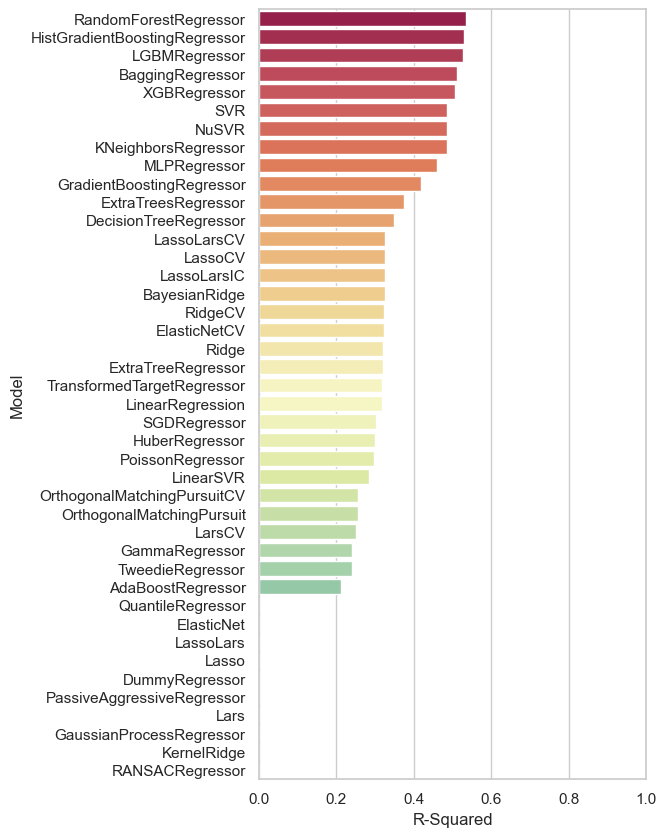

In [31]:
# Bar Plot of R-square value

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(data=train, x = "R-Squared", y = train.index, palette=('Spectral'))
ax.set(xlim=(0,1))


[(0.0, 10.0)]

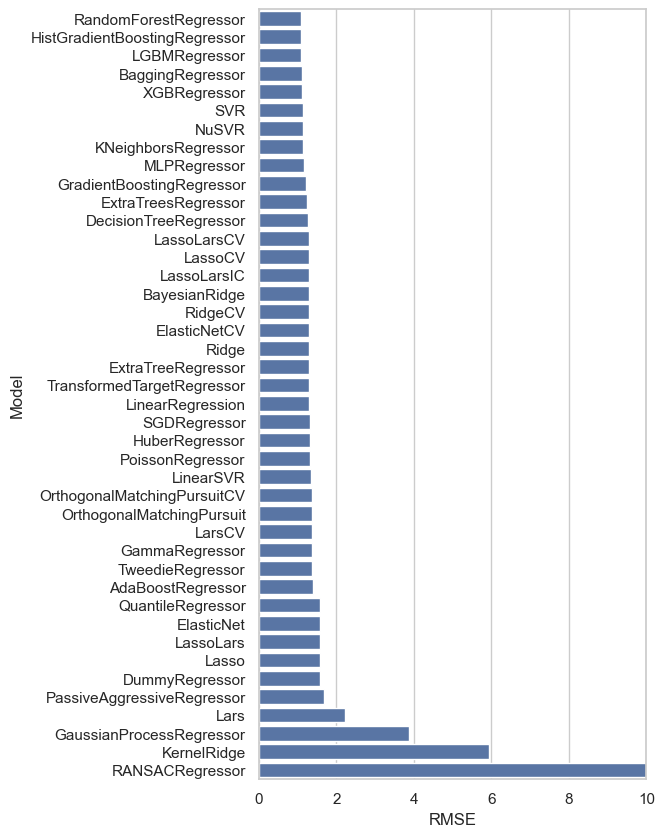

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='RMSE', data=train)
ax.set(xlim=(0,10))

[(0.0, 10.0)]

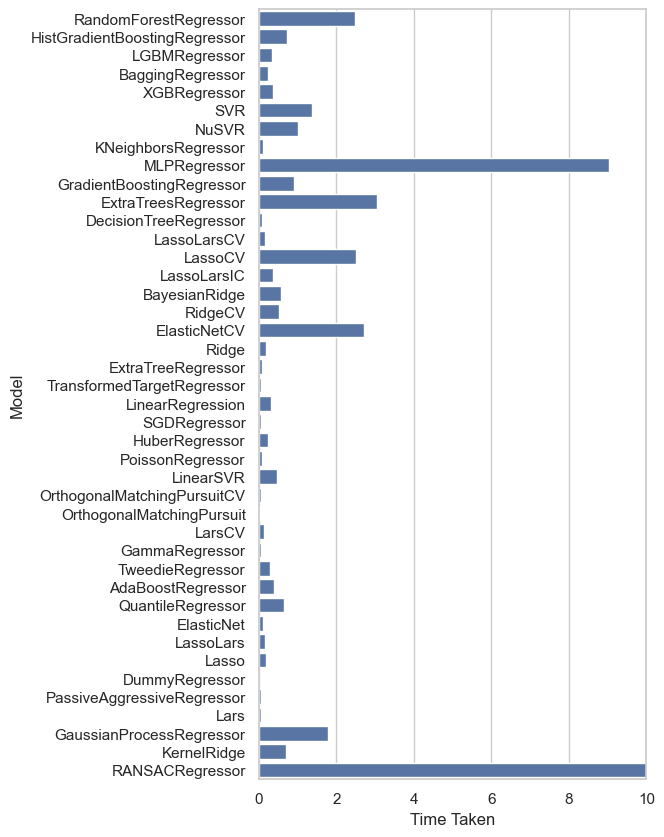

In [33]:
plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=train.index, x='Time Taken', data=train)
ax.set(xlim=(0,10))